### Code for generating various Seaborn graphs from timing and properties data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import timeit

# Load dataset
properties = pd.read_csv('../data/processed_properties.csv', header=0, index_col=0)
bridges = pd.read_csv('../data/bridges/bridges_unprocessed_timings.csv', header=0, index_col=0)
janus = pd.read_csv('../data/janus/janus_unprocessed_timings.csv', header=0, index_col=0)
comet = pd.read_csv('../data/comet/comet_unprocessed_timings.csv', header=0, index_col=0)
times_arr = [bridges, janus, comet]
times = pd.concat(times_arr)
combined = pd.merge(properties, times, on='matrix')

In [3]:
combined = combined.dropna()
combined = combined.drop_duplicates()
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319442 entries, 0 to 734456
Data columns (total 52 columns):
rows                  319442 non-null int64
cols                  319442 non-null int64
min_nnz_row           319442 non-null int64
row_var               319442 non-null float64
col_var               319442 non-null float64
diag_var              319442 non-null float64
nnz                   319442 non-null int64
frob_norm             319442 non-null float64
symm_frob_norm        319442 non-null float64
antisymm_frob_norm    319442 non-null float64
one_norm              319442 non-null float64
inf_norm              319442 non-null float64
symm_inf_norm         319442 non-null float64
antisymm_inf_norm     319442 non-null float64
max_nnz_row           319442 non-null int64
trace                 319442 non-null float64
abs_trace             319442 non-null float64
min_nnz_row.1         319442 non-null int64
avg_nnz_row           319442 non-null int64
dummy_rows            319442 

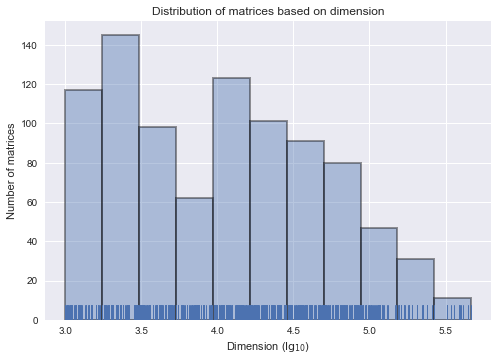

In [26]:
combined["log10_rows"] = np.log10(combined.rows)
ax = sns.distplot(combined.drop_duplicates(['matrix']).log10_rows, 
                  kde=False, rug=True, 
                  hist_kws=dict(edgecolor="k", linewidth=2))
ax.set(title='Distribution of matrices based on dimension', 
       xlabel='Dimension ($\lg_{10}$)', 
       ylabel='Number of matrices')
sns.plt.show()

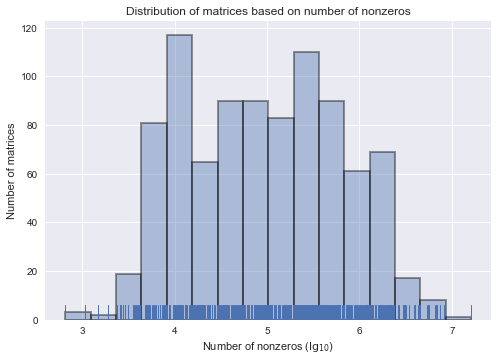

In [30]:
combined['log10_nnz'] = np.log10(combined.nnz)
ax = sns.distplot(combined.drop_duplicates(['matrix']).log10_nnz, 
                 kde=False, rug=True,
                 hist_kws=dict(edgecolor="k", linewidth=2))
ax.set(title='Distribution of matrices based on number of nonzeros', 
       xlabel='Number of nonzeros ($\lg_{10}$)', 
       ylabel='Number of matrices')
sns.plt.show()

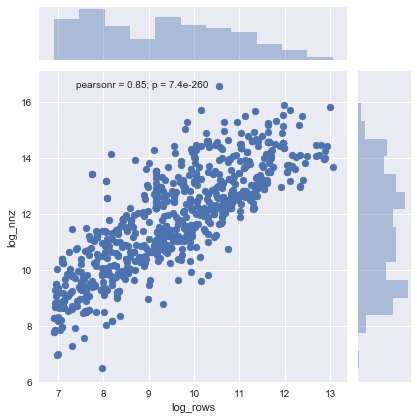

In [99]:
combined['log_rows'] = np.log(combined.rows)
combined['log_nnz'] = np.log(combined.nnz)
sns.jointplot(x="log_rows", y="log_nnz", data=combined.drop_duplicates(['matrix']))
sns.plt.show()

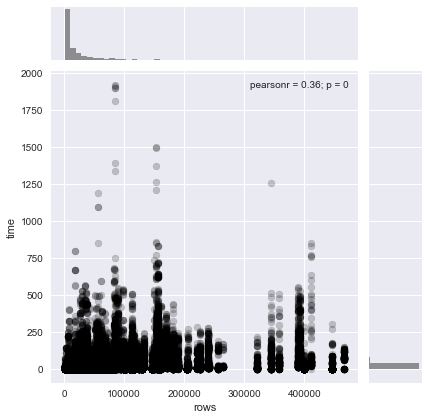

In [34]:
sns.jointplot(x="rows", y="time", data=combined.dropna(), alpha=0.2, color='k')
sns.plt.show()